In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.linear_model
import sklearn.model_selection
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [2]:
# baja y lee los datos
training = torchvision.datasets.FashionMNIST(root="./", train=True, download=True)
train_loader = torch.utils.data.DataLoader(training,shuffle=True)

testing = torchvision.datasets.FashionMNIST(root="./", train=False, download=True, 
                                            transform=torchvision.transforms.Normalize((0), (1.0)))
testing_loader = torch.utils.data.DataLoader(testing, shuffle=True)

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...



Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [59]:
# Selecciona y normaliza 600 para entrenar
train  = train_loader.dataset.data[:600].float()
target = train_loader.dataset.targets[:600].float()

mean = train.mean(dim=0)
std = train.std(dim=0)
std[std==0]=1.0

for i in range(len(train)):
    train[i] = (train[i]-mean)/std
np.shape(train)

torch.Size([600, 28, 28])

In [91]:
x_train = train.unsqueeze(1)
hidden_size = 20
net = torch.nn.Sequential(
                torch.nn.Conv2d(1, 7, 3, stride=1),  #Realizo una convolución multidimensional 
                torch.nn.Linear(26, hidden_size), #Luego realizo una red lineal 
                torch.nn.ReLU(), #Usamos la función Relu
                torch.nn.Flatten(1,-1), #Aplanamos los datos
                torch.nn.Linear(3640, 10) #Realizamos una red neuronal linea nuevamente
)

criterion = torch.nn.CrossEntropyLoss() #Usamos el criterio de pérdida de entropía cruzada
optimizer = torch.optim.SGD(net.parameters(), lr=0.01) #lr: learning rate
print (np.shape(x_train))

torch.Size([600, 1, 28, 28])


In [0]:
epochs = 120
loss_values = np.zeros(epochs)
F1_values_train = np.zeros(epochs)
F1_values_test = np.zeros(epochs)

inputs = torch.autograd.Variable(torch.Tensor(x_train).float())
targets = torch.autograd.Variable(torch.Tensor(target).long())
for epoch in range(epochs):

    optimizer.zero_grad()
    out = net(inputs)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    
    values, Y_predicted = torch.max(out.data, 1)
    loss_values[epoch] = loss.item()
    F1_values_train[epoch] = sklearn.metrics.f1_score(target, Y_predicted, average='macro')
    
    

Text(0.5, 1.0, 'F1 Score Vs Epoch')

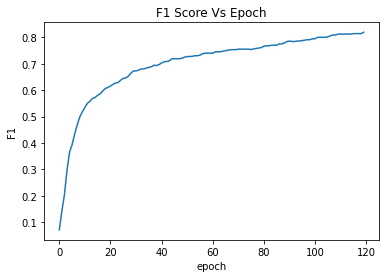

In [84]:
plt.plot(np.arange(epochs), F1_values_train, label='train')
plt.xlabel('epoch')
plt.ylabel('F1')
plt.title('F1 Score Vs Epoch')

Text(0.5, 1.0, 'Loss Vs. Epoch')

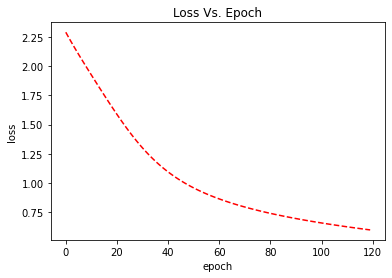

In [88]:
plt.plot(np.arange(epochs), loss_values, '--r')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss Vs. Epoch')